<a href="https://colab.research.google.com/github/Datascientisit/ML_regression/blob/main/Diabet_True_or_False.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Quyidagi ma'lumotlar to'plami Hindistonning Qandli diabet va buyrak kasalliklari milliy institutidan olingan. Maqsad diagnostik o'lchovlar asosida bemorda diabet bor-yo'qligini taxmin qilishdir.

Tarkib
Dataset ichida barcha bemorlar kamida 21 yoshli ayollari.

Ustunlar
Pregnancies: homilador bo'lish soni
Glucose: glyukozaga test natijasi
BloodPressure: diastolik qon bosimi (mm Hg)
SkinThickness: Triceps teri burmasining qalinligi (mm)
Insulin: 2 soatlik sarum insulini (mu U/ml)
BMI: Tana massasi indeksi (vazn kg / (m bo'yi) ^ 2)
DiabetesPedigreeFunction: diabetning naslchilik funktsiyasi
Age: Yosh (yil)
Outcome: Class (0 - diabet yo'q, 1 - diabet)

Hozir uchun kerak bo'lgan kutibxonalarni chaqirib olamiz

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


###Bizning mummoyimiz ML ning supervised bo'limining classification qismiga to'gri keladi, biroq biz to'gri tashxis qo'yishimiz uchun ma'lumotlarni o'rganib chiqishimiz kerak. Hozir aslida biz bu ma'lumotlarni har bir ustunini soxa mutaxasislari bilan maslahatlashgan xolatda qilishimiz kerak edi. Biroq, bizda bunday imkoniyat mavjud emas, lekin bizda ma'lumotlarni tahlil qilish jarayonida malumotlarni bir biriga bog'ikligini corrilatsya qilish bilan cheklanamiz

In [ ]:
# 0 - diabet yo'q, 1 - diabet. bizga aynan outcome ustuni yani diebet bo'lgan yoki bo'lmagan qismini boshqa \
#ustunlar bilan corrilyatsiyasini aniqlaymiz
df.corrwith(df['Outcome']).abs().sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.shape

(768, 9)

In [ ]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
x = df.drop("Outcome", axis=1)
y = df['Outcome'].copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
sceler = StandardScaler()

In [ ]:
x_prepared = sceler.fit_transform(x)
x_prepared

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_prepared, y, test_size=0.18, random_state=27)

#knn-algaritm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
y_test_predict=knn.predict(x_test)

Baholash

In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_test_predict)

0.43859649122807015

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_predict)

array([[82, 12],
       [20, 25]])

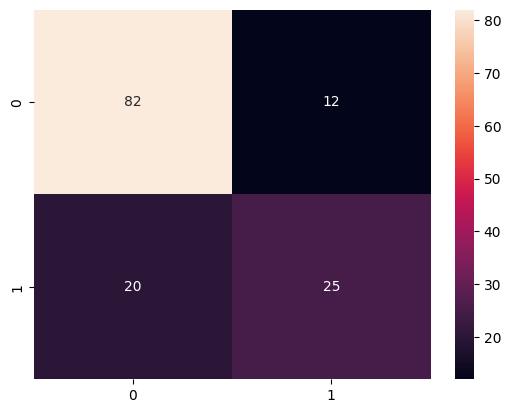

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_test_predict), annot=True)
plt.show()

Aniqlik judayam yuqori emas. Buning sababi, korrilyatsyadan ko'rinib turibdiki - ma'lumotlar bilan diabetga chalinganlikka sababli korrilyatsiya kuchli emas

### Bundan tashqari biz precision_score, recall_score, f1_score, accuracy_score

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_test, y_test_predict)
recall = recall_score(y_test, y_test_predict)
f1 = f1_score(y_test, y_test_predict)
accuracy = accuracy_score(y_test, y_test_predict)

print(f"Precision : {precision},\nRecall : {recall},\nF1 : {f1},\nAccuracy : {accuracy}")

Precision : 0.6756756756756757,
Recall : 0.5555555555555556,
F1 : 0.6097560975609757,
Accuracy : 0.7697841726618705


Biz hozir bularni yuqorida har birini alohida chaqirib har birini alohida o'qitdik,
  Aslida bu optimal emas biz buni barchasini bittada chiqarishimiz mumkin

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84        94
           1       0.68      0.56      0.61        45

    accuracy                           0.77       139
   macro avg       0.74      0.71      0.72       139
weighted avg       0.76      0.77      0.76       139



Cross-Validation yordamida tekshiramiz

In [ ]:
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator=knn, X=x, y=y, cv=5)

In [ ]:
predict

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,

In [ ]:
print(classification_report(y, predict))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       500
           1       0.65      0.56      0.60       268

    accuracy                           0.74       768
   macro avg       0.72      0.70      0.71       768
weighted avg       0.74      0.74      0.74       768



Eng yaxshi k qiymatini tanlash

In [ ]:
f1 = []
for k in range(1,30):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  y_predict = knn.predict(x_test)
  f1.append(f1_score(y_test, y_predict))

In [ ]:
f1

[0.5176470588235293,
 0.417910447761194,
 0.5647058823529412,
 0.47222222222222215,
 0.5432098765432098,
 0.5194805194805195,
 0.6024096385542169,
 0.5569620253164557,
 0.6097560975609757,
 0.5454545454545454,
 0.5499999999999999,
 0.5405405405405405,
 0.5569620253164557,
 0.5135135135135135,
 0.5679012345679012,
 0.5333333333333333,
 0.5569620253164557,
 0.5454545454545454,
 0.5432098765432098,
 0.5569620253164557,
 0.5365853658536586,
 0.5194805194805195,
 0.5432098765432098,
 0.4657534246575342,
 0.5316455696202531,
 0.45945945945945943,
 0.5316455696202531,
 0.4864864864864865,
 0.5249999999999999]

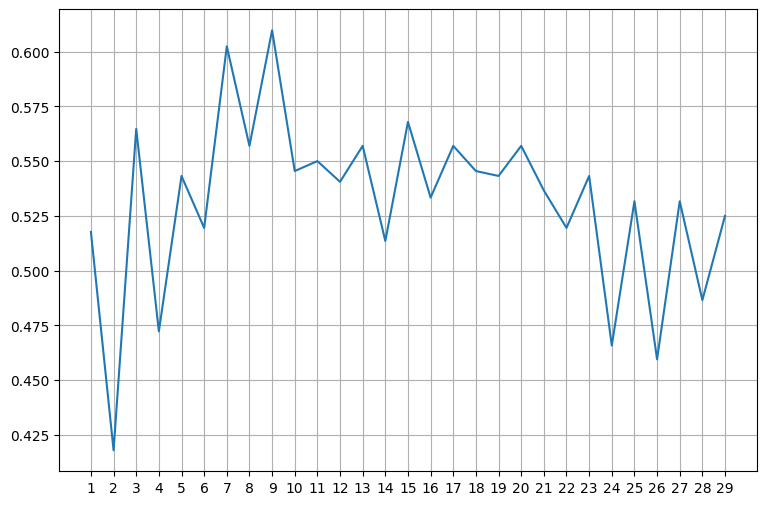

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(range(1,30),f1)
plt.xticks(range(1,30))
plt.grid()
plt.show()

Ko'rib turganingizdek k ning yaxshi qiymati chiqb keldi. Biroq biz buni qo'da qildik. Sikit-learnning afzalliklari shundaki bu narsalar uchun ham foydali funksiyalari bor

GridSearchCV algartimi

In [ ]:
from sklearn.model_selection import GridSearchCV

prem_grid = {"n_neighbors" : np.arange(1,25)}

knn_gcsv = GridSearchCV(knn, prem_grid, cv = 5)
knn_gcsv.fit(x,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
knn_gcsv.best_estimator_

KNeighborsClassifier(n_neighbors=14)

In [ ]:
knn_gcsv.best_params_

{'n_neighbors': 14}

In [ ]:
knn_gcsv.best_score_

0.7578558696205755

In [ ]:
knn_gcsv.classes_

array([0, 1])